In [7]:
import sys
sys.path.append(r'/Users/brendanliang/Code/brendans_bloomberg') 
import numpy as np
import pandas as pd
import os
import subprocess
import shlex
import matplotlib.pyplot as plt
from datetime import date
from tools.helper.pandas_tools import find_col_index
from interface.company import Company
from interface.indicator import Yahoo_Indicator
from interface.forex import forex

In [8]:
company = Company("PYPL")

# Share Price History

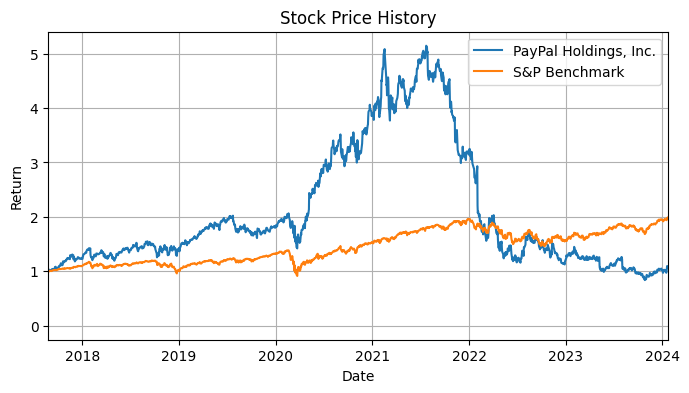

In [9]:
start_date = date(2017,8,25)
company_index = find_col_index(company.get_price_history().dates.transpose(), start_date, 0)
benchmark_index_index = find_col_index(Yahoo_Indicator("^GSPC").dates.transpose(), start_date, 0)
plt.figure(figsize=(8, 4))  # Customize the figure size if needed
plt.plot(company.get_price_history().dates, company.get_price_history().close/float(company.get_price_history().close.iloc[company_index]))  # Use dates or converted values for x-axis
plt.plot(Yahoo_Indicator("^GSPC").dates, Yahoo_Indicator("^GSPC").close/float(Yahoo_Indicator("^GSPC").close.iloc[benchmark_index_index]))
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Stock Price History")
plt.grid(True)
plt.xlim(start_date, date.today())
plt.legend([str(company.profile.name[0]), "S&P Benchmark"])

# Financial Performance

## Income Statement

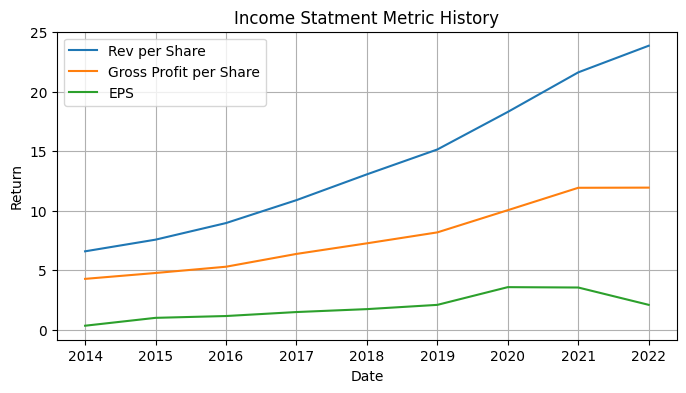

In [10]:
years_ref = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2024]
year = []
rev = []
earnings = []
grossprofit = []
num_shares = []
for yr in years_ref:
    try:
        annual_income_statement = company.get_annual_income_statement(yr)
        year.append(annual_income_statement.calendar_year)
        rev.append(annual_income_statement.revenue)
        earnings.append(annual_income_statement.net_income)
        grossprofit.append(annual_income_statement.gross_profit)
        num_shares.append(annual_income_statement.weighted_average_shs_out)
    except: pass

plt.figure(figsize=(8, 4))  # Customize the figure size if needed
plt.plot(year, np.array(rev)/np.array(num_shares))  # Use dates or converted values for x-axis
plt.plot(year, np.array(grossprofit)/np.array(num_shares))
plt.plot(year, np.array(earnings)/np.array(num_shares))
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Income Statment Metric History")
plt.grid(True)
plt.legend(["Rev per Share", "Gross Profit per Share", "EPS"])

## Cash Flows

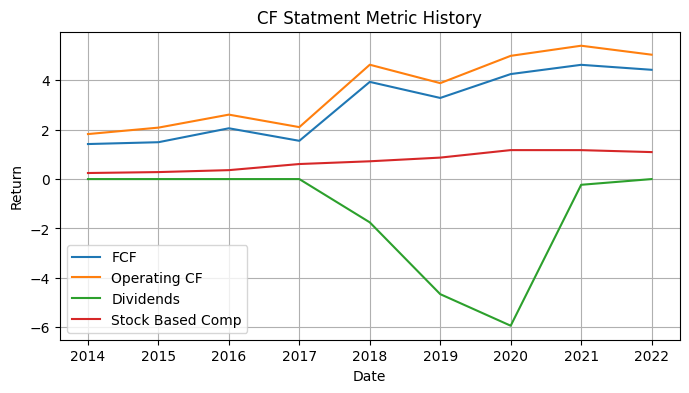

In [11]:
from interface.data_sources.cashflow_statement import annual_cashflow

year = []
fcf = []
operating_cf = []
stock_based_comp = []
dividends_paid = []
for yr in years_ref:
    try:
        annual_cashflow_statement = company.get_annual_cashflow(yr)
        year.append(annual_cashflow_statement.calendar_year)
        fcf.append(annual_cashflow_statement.free_cash_flow)
        operating_cf.append(annual_cashflow_statement.operating_cashflow)
        stock_based_comp.append(annual_cashflow_statement.stock_based_compensation)
        dividends_paid.append(annual_cashflow_statement.dividends_paid)
    except: pass

plt.figure(figsize=(8, 4))  # Customize the figure size if needed
plt.plot(year, np.array(fcf)/np.array(num_shares))  # Use dates or converted values for x-axis
plt.plot(year, np.array(operating_cf)/np.array(num_shares))
plt.plot(year, np.array(dividends_paid)/np.array(num_shares))
plt.plot(year, np.array(stock_based_comp)/np.array(num_shares))
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("CF Statment Metric History")
plt.grid(True)
plt.legend(["FCF","Operating CF","Dividends","Stock Based Comp"])

## Balance Sheet

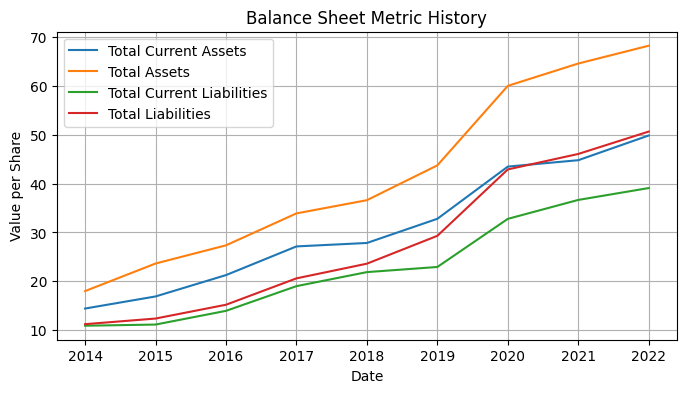

In [12]:

year = []
total_current_assets = []
total_assets = []
total_current_liabilities = []
total_liabilities = []

for yr in years_ref:
    try:
        annual_balancesheet = company.get_annual_balance_sheet(yr)
        year.append(annual_balancesheet.calendar_year)
        total_current_assets.append(annual_balancesheet.total_current_assets)
        total_assets.append(annual_balancesheet.total_assets)
        total_current_liabilities.append(annual_balancesheet.total_current_liabilities)
        total_liabilities.append(annual_balancesheet.total_liabilities)
    except: pass

plt.figure(figsize=(8, 4))  # Customize the figure size if needed
plt.plot(year, np.array(total_current_assets)/np.array(num_shares))  # Use dates or converted values for x-axis
plt.plot(year, np.array(total_assets)/np.array(num_shares))
plt.plot(year, np.array(total_current_liabilities)/np.array(num_shares))
plt.plot(year, np.array(total_liabilities)/np.array(num_shares))
plt.xlabel("Date")
plt.ylabel("Value per Share")
plt.title("Balance Sheet Metric History")
plt.grid(True)
plt.legend(["Total Current Assets","Total Assets","Total Current Liabilities","Total Liabilities"])

# Historical Valuations